In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
message = pd.read_csv(r"C:\Users\HP\Desktop\Datasets_CSV\spam.csv", encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
message.shape

(5572, 2)

In [4]:
message['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

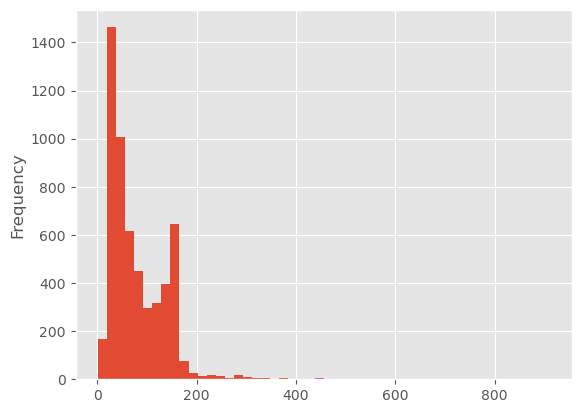

In [8]:
message['length'].plot(bins=50,kind='hist')

In [9]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [10]:
message[message['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'

Text Pre-processing
Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.
In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).
As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.
Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.
First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let us write a function which removes punctuation and stopwords from our data

In [14]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [15]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.
We'll do that in three steps using the bag-of-words model:
Count how many times does a word occur in each message (Known as term frequency)
Weigh the counts, so that frequent tokens get lower weight
Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
Let's begin the first step:
Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.
We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

In [21]:
'''For example:
Word 1 Count	Word 2 Count	...	Word N Count
Message 1	0	1	...	0
Message 2	0	0	...	0
...	1	2	...	0
Message N	0	1	...	1'''

'For example:\nWord 1 Count\tWord 2 Count\t...\tWord N Count\nMessage 1\t0\t1\t...\t0\nMessage 2\t0\t0\t...\t0\n...\t1\t2\t...\t0\nMessage N\t0\t1\t...\t1'

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:

In [42]:
del vectorizer

In [52]:

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['message'])

In [27]:
print(message.columns)

Index(['label', 'message', 'length'], dtype='object')


In [53]:
X.toarray()[4560]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
vocabulary = vectorizer.get_feature_names_out()
print(vocabulary)

['00' '000' '03' '04' '0800' '08000839402' '08000930705' '10' '100' '1000'
 '10p' '11' '12' '12hrs' '150' '150p' '150ppm' '16' '18' '1st' '20' '200'
 '2000' '2003' '250' '2lands' '2nd' '2nite' '30' '350' '50' '500' '5000'
 '750' '800' '8007' '86688' '87066' '900' 'abiola' 'able' 'about' 'abt'
 'ac' 'account' 'across' 'actually' 'address' 'admirer' 'aft' 'after'
 'afternoon' 'again' 'age' 'ago' 'ah' 'aight' 'all' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'am' 'amp' 'an' 'and' 'angry'
 'another' 'ans' 'answer' 'any' 'anyone' 'anything' 'anytime' 'anyway'
 'apply' 'ard' 'are' 'area' 'around' 'as' 'asap' 'ask' 'askd' 'asked'
 'asking' 'ass' 'at' 'attempt' 'auction' 'available' 'await' 'award'
 'awarded' 'away' 'awesome' 'b4' 'babe' 'baby' 'back' 'bad' 'balance'
 'bank' 'bath' 'bathe' 'bcoz' 'be' 'beautiful' 'because' 'bed' 'been'
 'before' 'being' 'believe' 'best' 'better' 'between' 'big' 'birthday'
 'bit' 'blue' 'bonus' 'book' 'booked' 'bored' 'both' 'bout' 'box' 'boy'
 'boyto

In [46]:
num_features=len(vocabulary)
print(num_features)

1016


In [47]:
X.toarray().shape

(5572, 1016)

In [48]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [60]:
original_message = message.iloc[4065]['message']
# Remove the unwanted substring
cleaned_message = original_message.replace('&','').replace(';','').replace('#','')
print(cleaned_message)

Fyi I'm gonna call you sporadically starting at like  ltgt  bc we are not not doin this shit


In [62]:
sum(X.toarray()[4065])

14

In [63]:
X.toarray()[4065]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
sum(X.toarray()[4560])

26

In [69]:
print(feature_names[671])
print(feature_names[560])
# print("Total number of features:", feature_names.shape[0])


pray
movie


Training a model
Firstly we will do the usual train test split

In [71]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['label'],test_size=0.2)

In [72]:
msg_train.head()

488                                                         Depends on quality. If you want the type i sent boye, faded glory, then about 6. If you want ralphs maybe 2
4394                                                                                         Only just got this message, not ignoring you. Yes, i was. Shopping that is
4803                                                 Er, hello, things didnÛ÷t quite go to plan ÛÒ is limping slowly home followed by aa and with exhaust hanging off
2298                                                                                              Dont pick up d call when something important is There to tell. Hrishi
1784    Dont search love, let love find U. Thats why its called falling in love, bcoz U dont force yourself, U just fall and U know there is smeone to hold U... BSLVYL
Name: message, dtype: object

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can use Naive Bayes Classifier to perform this classification task

In [73]:

train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [74]:
train_vectorized

<4457x1016 sparse matrix of type '<class 'numpy.int64'>'
	with 46545 stored elements in Compressed Sparse Row format>

In [75]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [76]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [77]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
# Confusion matrices for train and test 

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3053  813]
 [   0  591]]
[[764 195]
 [  8 148]]


In [80]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.79      0.88      3866
        spam       0.42      1.00      0.59       591

    accuracy                           0.82      4457
   macro avg       0.71      0.89      0.74      4457
weighted avg       0.92      0.82      0.84      4457



              precision    recall  f1-score   support

         ham       0.99      0.80      0.88       959
        spam       0.43      0.95      0.59       156

    accuracy                           0.82      1115
   macro avg       0.71      0.87      0.74      1115
weighted avg       0.91      0.82      0.84      1115

